### Importing necessary libaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importing Train Data

In [2]:
train_hcp = pd.read_csv("Doceree-HCP_Train.csv", encoding="ISO-8859-1", dtype={'USERZIPCODE':'Int64', 'IS_HCP':'Int64'})
train_hcp.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0
1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0
2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0
3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1
4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,NaN,0


### Data Pre-processing

In [3]:
# Segregating IS_HCP=1 data and saving it as Training Data, as our goal is to find Taxonomy of the Healthcare Professionals

train_hcp = train_hcp[train_hcp['IS_HCP']==1]
train_hcp.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1
8,1009,Mobile,2,104.172.116.202,be61a8f7-0f00-487f-8a56-679c819fa01a,Granada Hills,91344,Mozilla/5.0 (iPhone; CPU iPhone OS 15_5 like M...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Intensive Care|Shock|Ischemic Heart Disease|He...,2084P0804X,1
21,1022,Desktop,3,108.217.77.216,6d0996e0-b6f4-4bb8-ae40-13ee2ae10706,NaN,912031130,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/protein-require...,Gastrointestinal Tract|Female|Oncology|Medicin...,2084N0400X,1
29,1030,Desktop,7,23.125.217.54,18783e3e-89b3-4b50-a143-231bc9e235f2,Buena Park,90620,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,Online Medical Journal,Website,https://www.cureus.com/articles/39455-whats-th...,Rehabilitation|Transplantation|Clinical|Preven...,2084V0102X,1
35,1036,Desktop,2,73.4.155.15,cca6db3d-9041-4666-904a-6626154459da,Somerville,2143,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.rheumatologyadvisor.com/home/decis...,Dermatomyositis|Preventive|Male|Dermatology|Ag...,207RC0000X,1


In [4]:
# Getting Information about Train Data

train_hcp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34180 entries, 3 to 113936
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               34180 non-null  int64 
 1   DEVICETYPE       34180 non-null  object
 2   PLATFORM_ID      34180 non-null  int64 
 3   BIDREQUESTIP     34180 non-null  object
 4   USERPLATFORMUID  34176 non-null  object
 5   USERCITY         32358 non-null  object
 6   USERZIPCODE      34124 non-null  Int64 
 7   USERAGENT        34180 non-null  object
 8   PLATFORMTYPE     34180 non-null  object
 9   CHANNELTYPE      34180 non-null  object
 10  URL              34180 non-null  object
 11  KEYWORDS         34180 non-null  object
 12  TAXONOMY         32313 non-null  object
 13  IS_HCP           34180 non-null  Int64 
dtypes: Int64(2), int64(2), object(10)
memory usage: 4.0+ MB


In [5]:
# Checking Null Values for each column of Train Data

train_hcp.isnull().sum()

ID                    0
DEVICETYPE            0
PLATFORM_ID           0
BIDREQUESTIP          0
USERPLATFORMUID       4
USERCITY           1822
USERZIPCODE          56
USERAGENT             0
PLATFORMTYPE          0
CHANNELTYPE           0
URL                   0
KEYWORDS              0
TAXONOMY           1867
IS_HCP                0
dtype: int64

In [6]:
# Checking number of rows and columns for Train data

train_hcp.shape

(34180, 14)

### Data Analysis

In [7]:
# Checking Null Values for Target Variable TAXONOMY

train_hcp[train_hcp['TAXONOMY'].isnull()]

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
149,1150,Desktop,14,170.212.0.93,52a357cb-b06c-464c-ad23-c7384f3aef0f,Philadelphia,19139,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Medical News Platform,Website,https://consumer.healthday.com,covid|family practice|pain|vocal cords|health|...,NaN,1
157,1158,Desktop,5,143.197.222.231,485adfa2-be0d-4245-bdc1-ee4e8ca8e5f8,Loma Linda,92354,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://fpnotebook.com/Ortho/Foot/HmrT.htm,small|nephrology|radiology|oncology|neonatolog...,NaN,1
242,1243,Desktop,14,128.146.189.103,82fcc028-f146-4efb-b95e-69fd62109bbc,Columbus,43210,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Medical News Platform,Website,https://consumer.healthday.com,covid|family practice|pain|vocal cords|health|...,NaN,1
280,1281,Desktop,7,162.33.226.10,44eabb84-71fe-4a91-afc4-ea1f6fcac855,Queens,11103,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cureus.com/dashboard/my_documents,Specialties|Health|Cardiac|False|Anesthesiolog...,NaN,1
319,1320,Desktop,14,128.146.189.103,82fcc028-f146-4efb-b95e-69fd62109bbc,Columbus,43210,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Medical News Platform,Website,https://consumer.healthday.com,covid|family practice|pain|vocal cords|health|...,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113525,114526,Desktop,2,184.164.188.106,b6ffcd26-0f05-4a1d-bfba-c7521cf841ed,Miami Beach,33141,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.endocrinologyadvisor.com/home/topi...,myocardial infarction|rheumatology|psychiatry|...,NaN,1
113537,114538,Desktop,14,128.146.189.103,82fcc028-f146-4efb-b95e-69fd62109bbc,Columbus,43210,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Medical News Platform,Website,https://consumer.healthday.com,covid|family practice|pain|vocal cords|health|...,NaN,1
113552,114553,Desktop,14,128.146.52.103,82fcc028-f146-4efb-b95e-69fd62109bbc,Columbus,43220,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Medical News Platform,Website,https://consumer.healthday.com,covid|family practice|pain|vocal cords|health|...,NaN,1
113589,114590,Desktop,7,73.125.77.2,49ba3805-c931-4adc-8aaf-ee0d5bd59424,Boca Raton,33433,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cureus.com/articles/142282-dormant...,small|hospitals|nephrology|emergency medicine|...,NaN,1


Looking at the 1867 null values, it is clear that we cannot remove these rows as it would be a data loss.
Hence we add all these rows under a new category named "NA" for Taxonomy.
These category can include HCPs from Unknown Physician Specialty, or All Other Suppliers, or Unknown Supplier/Provider 
Specialty etc. <br>
This data has been referred from: https://www.cms.gov/Medicare/Provider-Enrollment-and-Certification/MedicareProviderSupEnroll/downloads/taxonomy.pdf

In [8]:
# Filling new category "NA" value for null TAXONOMY values and verifying changes

train_hcp['TAXONOMY'] = train_hcp['TAXONOMY'].fillna('NA')

train_hcp[train_hcp['TAXONOMY'].isnull()]

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP


In [9]:
# Getting unique values and counts from Target variable TAXONOMY

train_hcp['TAXONOMY'].value_counts()

2084P0800X    7930
2084N0400X    6621
207Q00000X    3997
207R00000X    3190
NA            1867
              ... 
163WC0400X       1
246QM0706X       1
1835N1003X       1
207RI0008X       1
207XX0801X       1
Name: TAXONOMY, Length: 208, dtype: int64

In [10]:
# Finding Total number of categories for our Target variable

train_hcp['TAXONOMY'].nunique()

208

### Feature Engineering and Feature Selection

In [11]:
# Method to calculate CIDR Block based on the ip block range as input

def Find_CIDR(ip_block):
    if ip_block >= 0 and ip_block <= 127:
        cidr_block = 0  # 'A' Block
    elif ip_block >= 128 and ip_block <= 191:
        cidr_block = 1  # 'B' BLock
    elif ip_block >= 192 and ip_block <= 223:
        cidr_block = 2  # 'C' Block
    elif ip_block >=224 and ip_block <= 239:
        cidr_block = 3  # 'D' Block
    elif ip_block >= 240 and ip_block <= 255:
        cidr_block = 4  # 'E' Block
    else:
        cidr_block = np.nan
        
    return cidr_block

In [12]:
# Method to categorize BIDREQUESTIP into CIDR Blocks

def CIDR(hcp_data):
    cidr_block = []
    for bid_request_ip in hcp_data:
        ip_block = int(bid_request_ip.split('.')[0])
        cidr = Find_CIDR(ip_block)
        cidr_block.append(cidr)
    return cidr_block

In [13]:
# Assigning new column CIDRBLOCK that contains CIDR Block categories based on BIDREQUESTIP

cidr_block = CIDR(train_hcp['BIDREQUESTIP'])
train_hcp.insert(loc=3, column='CIDRBLOCK', value=cidr_block)

train_hcp.head()

,ID,DEVICETYPE,PLATFORM_ID,CIDRBLOCK,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
3,1004,Desktop,3,1,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1
8,1009,Mobile,2,0,104.172.116.202,be61a8f7-0f00-487f-8a56-679c819fa01a,Granada Hills,91344,Mozilla/5.0 (iPhone; CPU iPhone OS 15_5 like M...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Intensive Care|Shock|Ischemic Heart Disease|He...,2084P0804X,1
21,1022,Desktop,3,0,108.217.77.216,6d0996e0-b6f4-4bb8-ae40-13ee2ae10706,NaN,912031130,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/protein-require...,Gastrointestinal Tract|Female|Oncology|Medicin...,2084N0400X,1
29,1030,Desktop,7,0,23.125.217.54,18783e3e-89b3-4b50-a143-231bc9e235f2,Buena Park,90620,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,Online Medical Journal,Website,https://www.cureus.com/articles/39455-whats-th...,Rehabilitation|Transplantation|Clinical|Preven...,2084V0102X,1
35,1036,Desktop,2,0,73.4.155.15,cca6db3d-9041-4666-904a-6626154459da,Somerville,2143,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.rheumatologyadvisor.com/home/decis...,Dermatomyositis|Preventive|Male|Dermatology|Ag...,207RC0000X,1


We used values from BIDREQUESTIP column and converted the data into 5 CIDR Block categories inorder to drive more information, and reduce the number of categorical values from BIDREQUESTIP column.

In [14]:
# Verifying CIDRBLOCK does not contain Null Values

train_hcp['CIDRBLOCK'].isnull().sum()

0

In [15]:
# Finding various categories for DEVICETYPE column

train_hcp['DEVICETYPE'].value_counts()

Desktop    21262
Mobile     11268
Tablet      1650
Name: DEVICETYPE, dtype: int64

In [16]:
# Dropping Redudant Columns from Train Data

train_hcp.drop(['ID', 'BIDREQUESTIP', 'USERPLATFORMUID', 'USERCITY', 'USERZIPCODE', 'USERAGENT', 'CHANNELTYPE', 'IS_HCP'], axis=1, inplace=True)
train_hcp.head()

,DEVICETYPE,PLATFORM_ID,CIDRBLOCK,PLATFORMTYPE,URL,KEYWORDS,TAXONOMY
3,Desktop,3,1,Online Medical Journal,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X
8,Mobile,2,0,Online Medical Journal,https://www.cancertherapyadvisor.com/home/deci...,Intensive Care|Shock|Ischemic Heart Disease|He...,2084P0804X
21,Desktop,3,0,Online Medical Journal,https://globalrph.com/medcalcs/protein-require...,Gastrointestinal Tract|Female|Oncology|Medicin...,2084N0400X
29,Desktop,7,0,Online Medical Journal,https://www.cureus.com/articles/39455-whats-th...,Rehabilitation|Transplantation|Clinical|Preven...,2084V0102X
35,Desktop,2,0,Online Medical Journal,https://www.rheumatologyadvisor.com/home/decis...,Dermatomyositis|Preventive|Male|Dermatology|Ag...,207RC0000X


In [17]:
# Method to calculate url_domain given url as input

def FindDomain(hcp_data):
    domains=[]
    for url in hcp_data:
        url_domain = url
        if ".org" in url:
            url_domain = url.split('.org')[0]
            url_domain += '.org/'
        else:
            url_domain = url.split('.com')[0]
            url_domain += '.com/'
        domains.append(url_domain)
    return domains

In [18]:
# Assigning new column URLDOMAIN based on values from URL column

url_domain = FindDomain(train_hcp['URL'])
train_hcp.insert(loc=5, column='URLDOMAIN', value=url_domain)

In [19]:
# Getting various unique values from URLDOMAIN column

train_hcp['URLDOMAIN'].value_counts()

https://www.cureus.com/                      4155
https://www.clinicaladvisor.com/             3475
https://www.rheumatologyadvisor.com/         2588
https://www.medicalbag.com/                  2276
https://www.empr.com/                        2202
https://www.cancertherapyadvisor.com/        2155
https://www.renalandurologynews.com/         2040
https://www.clinicalpainadvisor.com/         1904
https://www.neurologyadvisor.com/            1443
https://www.2minutemedicine.com/             1437
https://www.gastroenterologyadvisor.com/     1134
https://www.pulmonologyadvisor.com/          1106
https://globalrph.com/                       1023
https://www.goodrx.com/                       946
https://www.grantsformedical.com/             825
https://www.rarediseaseadvisor.com/           770
https://www.dermatologyadvisor.com/           770
https://consumer.healthday.com/               725
https://www.infectiousdiseaseadvisor.com/     584
https://allmedx.com/                          500


In [20]:
# Getting total number of unique entries from URLDOMAIN column

train_hcp['URLDOMAIN'].nunique()

36

Inorder to reduce a large number of categoricalvalues from URL column, we extracted their domain and stored in a separate column

In [21]:
# Dropping Redudant Columns

train_hcp.drop(['PLATFORM_ID','URL','KEYWORDS'], axis=1, inplace=True)
train_hcp.head()

,DEVICETYPE,CIDRBLOCK,PLATFORMTYPE,URLDOMAIN,TAXONOMY
3,Desktop,1,Online Medical Journal,https://globalrph.com/,2084P0800X
8,Mobile,0,Online Medical Journal,https://www.cancertherapyadvisor.com/,2084P0804X
21,Desktop,0,Online Medical Journal,https://globalrph.com/,2084N0400X
29,Desktop,0,Online Medical Journal,https://www.cureus.com/,2084V0102X
35,Desktop,0,Online Medical Journal,https://www.rheumatologyadvisor.com/,207RC0000X


In [22]:
# Encoding for Unique Values of PLATFORMTYPE

PLATFORMTYPE = {
    "Electronic Health Record" : 0,
    "Online Medical Journal" : 1,
    "Online Learning Portal" : 2,
    "Medical News Platform" : 3,
    "Tele-medicine Platform" : 4
}
max_pltype = 4

In [23]:
# Encoding for Unique Values of URLDOMAIN

URLDOMAIN = {
    "https://www.h2hdigitalrx.com/" : 0,
    "https://www.clinicaladvisor.com/" : 1,
    "https://www.cancertherapyadvisor.com/" : 2,
    "https://www.empr.com/" : 3,
    "https://www.rheumatologyadvisor.com/" : 4,
    "https://www.renalandurologynews.com/" : 5,
    "https://www.gastroenterologyadvisor.com/" : 6,
    "https://www.dermatologyadvisor.com/" : 7,
    "https://www.neurologyadvisor.com/" : 8,
    "https://www.psychiatryadvisor.com/" : 9,
    "https://www.pulmonologyadvisor.com/" : 10,
    "https://www.clinicalpainadvisor.com/" : 11,
    "https://www.medicalbag.com/" : 12,
    "https://www.rarediseaseadvisor.com/" : 13,
    "https://www.thecardiologyadvisor.com/" : 14,
    "https://www.infectiousdiseaseadvisor.com/" : 15,
    "https://www.endocrinologyadvisor.com/" : 16,
    "https://www.oncologynurseadvisor.com/" : 17,
    "https://www.hematologyadvisor.com/" : 18,
    "https://www.ophthalmologyadvisor.com/" : 19,
    "https://www.optometryadvisor.com/" : 20,
    "https://uat.clinicalpainadvisor.com/" : 21,
    "https://uat.clinicaladvisor.com/": 22,
    "https://globalrph.com/" : 23,
    "https://allmedx.com/" : 24,
    "https://fpnotebook.com/" : 25,
    "https://www.fpnotebook.com/" : 25,
    "https://www.goodrx.com/" : 26,
    "https://www.cureus.com/" : 27,
    "https://radrounds.com/" : 28,
    "https://www.2minutemedicine.com/" : 29,
    "https://www.grantsformedical.com/" : 30,
    "https://radiopaedia.org/" : 31,
    "https://consumer.healthday.com/" : 32,
    "https://www.epainassist.com/" : 33,
    "https://epainassist.com/" : 33,
    "https://precisionmdapp.com/" : 34
}
max_urldomain = 34

In [24]:
# Method to Label Encode values from column PLATFORMTYPE

def LabelEncodePlatformType(hcp_data):
    global max_pltype
    platform_type = []
    for pltype in hcp_data:
        if pltype in PLATFORMTYPE:
            platform_type.append(PLATFORMTYPE[pltype])
        else:
            max_pltype += 1
            PLATFORMTYPE[pltype] = max_pltype
            platform_type.append(max_pltype)
    return platform_type

In [25]:
# Method to Label Encode values from column URLDOMAIN

def LabelEncodeUrlDomain(hcp_data):
    global max_urldomain
    url_domain = []
    for url in hcp_data:
        if url in URLDOMAIN:
            url_domain.append(URLDOMAIN[url])
        else:
            max_urldomain += 1
            URLDOMAIN[url] = max_urldomain
            url_domain.append(max_urldomain)
    return url_domain

In [26]:
# Importing LabelEncoder for encoding DEVICETYPE and TAXONOMY

from sklearn.preprocessing import LabelEncoder

In [27]:
# Label Encoding DEVICETYPE, PLATFORMTYPE, URLDOMAIN, TAXONOMY

train_hcp['PLATFORMTYPE'] = LabelEncodePlatformType(train_hcp['PLATFORMTYPE'])
train_hcp['URLDOMAIN'] = LabelEncodeUrlDomain(train_hcp['URLDOMAIN'])

le_device = LabelEncoder()
train_hcp['DEVICETYPE'] = le_device.fit_transform(train_hcp['DEVICETYPE'])

le_taxonomy = LabelEncoder()
train_hcp['TAXONOMY'] = le_taxonomy.fit_transform(train_hcp['TAXONOMY'])

train_hcp.head()

,DEVICETYPE,CIDRBLOCK,PLATFORMTYPE,URLDOMAIN,TAXONOMY
3,0,1,1,23,149
8,1,0,1,2,151
21,0,0,1,23,143
29,0,0,1,27,156
35,0,0,1,4,56


For a certain PLATFORM_ID, PLATFORMTYPE and URLDOMAIN were the same. So inorder to preserve the pattern, we did manual label encoding.

<Axes: >

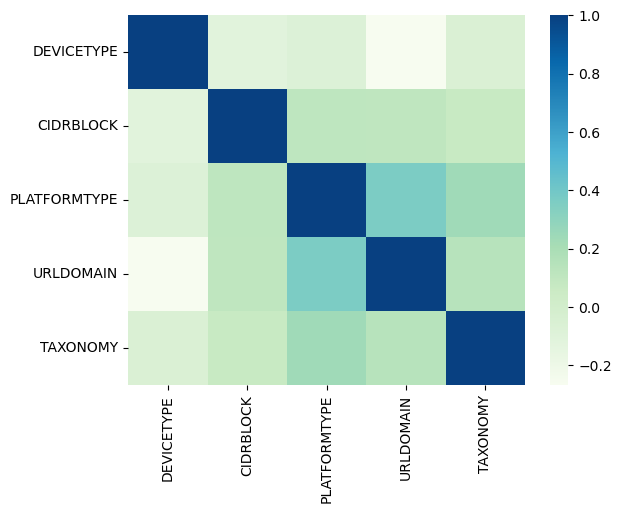

In [28]:
# Getting Correlations of Features and Target Variable

sns.heatmap(train_hcp.corr(), cmap="GnBu")

### Building Training and Validation Sets

In [29]:
# Separating Data into Features X and Target Y

X = train_hcp.drop(['TAXONOMY'], axis=1)
Y = train_hcp['TAXONOMY']

In [30]:
# Splitting data into training and validation sets for model building

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

We divided our Training Data into 70% Train Data and 30% Validation Data for Model Building Phase.

### Model Building

In [31]:
# Building Decision Tree Model, Model Training

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, Y_train)
Y_pred_dt = dt_clf.predict(X_test)

In [32]:
# Transforming target predictions in desired format needed for evaluation

Y_true = Y_test.values.astype("int")
Y_true

array([185,  50, 149, ...,  43, 145,  86])

In [33]:
# Transforming target predictions in desired format needed for evaluation

Y_pred_dt = Y_pred_dt.astype("int")
Y_pred_dt

array([143, 149, 149, ...,  60, 149, 149])

In [34]:
# Building Random Forest Model

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, Y_train)
Y_pred_rf = rf_clf.predict(X_test)

Y_true = Y_test.values.astype("int")
Y_pred_rf = Y_pred_rf.astype("int")

### Model Evaluation

In [35]:
# Model Evaluation using Metric Accuracy, evaluating Decision Tree Model

from sklearn.metrics import accuracy_score

print("Accuracy for Decision Tree Model: ",accuracy_score(Y_true, Y_pred_dt))

Accuracy for Decision Tree Model:  0.34386580846498926


In [36]:
# Evaluating accuracy of Random Forest Model

print("Accuracy for Random Forest Model: ",accuracy_score(Y_true, Y_pred_rf))

Accuracy for Random Forest Model:  0.34386580846498926


By comparing the accuracies of both the models: Decision Tree and Random Forest, we can see that Random Forest Model has outperformed. <br>
Hence selecting Random Forest Model for further predictions on Test Data.

The reason behind such low accuracy is that, we have a huge number accounting to 208 categories for Target variable TAXONOMY.
In such a case, we will require huge amount of data to make accurate predictions, but in our case we have only approximately 34,000 entries in our training data.
Hence, our accuracy is low being 34%.

### Importing Test Data

We will import "Doceree-HCP_Submission.csv" file, and segregate entries where our HCP model has predicted IS_HCP=1. <br>
Thus, we will find the feature data of these predictions from file "Doceree-HCP_Test.csv" using ID as our primary key. <br>
Finally, we will pass all these entries to out Taxonomy Model for prediction.

In [37]:
# Importing Test Data

test_hcp = pd.read_csv("Doceree-HCP_Test.csv", encoding="ISO-8859-1")
test_hcp.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS
0,115501,Desktop,2,75.189.231.103,0d5041ff-f0b6-4d1a-9ad7-0a29f7d485b4,Fayetteville,28305.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/features/...,Family Practice|Drainage|Clinical|Dermatology|...
1,115502,Mobile,2,24.101.33.158,c8396dd0-969f-4d99-a40b-b7bb1f516154,Conneaut Lake,16316.0,Mozilla/5.0 (iPhone; CPU iPhone OS 15_6_1 like...,Online Medical Journal,Website,https://www.ophthalmologyadvisor.com/topics/ca...,General|Clinical|Operative|Medicine|Cardiology...
2,115503,Desktop,2,172.118.216.142,3c97a081-6518-43f8-9f26-369759cfb471,Covina,91724.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.psychiatryadvisor.com/author/tori-...,Abortion|Anxiety Disorders|Apnea|False|Trauma|...
3,115504,Desktop,7,71.105.120.171,3e2578c8-f794-41af-a38c-c5cfb3c0f014,Brooklyn,11226.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cureus.com/articles/105482-diverti...,Health|Male|Neurological Surgery|Otolaryngolog...
4,115505,Desktop,2,73.82.211.73,ec2ae7ce-6a8c-4156-98a7-07203e60f483,Marietta,30062.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.renalandurologynews.com/home/confe...,chronic kidney disease|pain|nephrology|disease...


In [38]:
# Importing data predicted by HCP Model and subsetting data where IS_HCP=1

hcp_submission = pd.read_csv("Doceree-HCP_Submission.csv", encoding="ISO-8859-1", dtype={'ID':'Int64', 'IS_HCP':'Int64'})
hcp_pred = hcp_submission[hcp_submission['IS_HCP']==1]
hcp_pred.head()

,ID,IS_HCP
1,115502,1
10,115511,1
13,115514,1
25,115526,1
26,115527,1


In [39]:
# Creating final dataset that will be passed for prediction

test_taxonomy = pd.merge(test_hcp, hcp_pred, how='inner',on='ID')
test_taxonomy.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,IS_HCP
0,115502,Mobile,2,24.101.33.158,c8396dd0-969f-4d99-a40b-b7bb1f516154,Conneaut Lake,16316.0,Mozilla/5.0 (iPhone; CPU iPhone OS 15_6_1 like...,Online Medical Journal,Website,https://www.ophthalmologyadvisor.com/topics/ca...,General|Clinical|Operative|Medicine|Cardiology...,1
1,115511,Desktop,10,174.49.215.162,85a51411-ce7c-4753-9bf5-ad9ad949cbff,York,174024661.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.grantsformedical.com/in-house-fina...,Oral|Dentistry|Physicians|Small|Surgery|Hospit...,1
2,115514,Mobile,2,97.102.237.250,c92c0e1d-38e8-4717-8ff6-4a6c932177f0,Melbourne,32904.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1 like M...,Online Medical Journal,Website,https://www.rheumatologyadvisor.com/home/gener...,Myopathies|Small|Rheumatoid|Psychiatry|Urology...,1
3,115526,Desktop,2,104.4.147.195,25a48d79-fb2b-4564-a664-e46b681037c5,North Charleston,29405.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.neurologyadvisor.com/neurology-cme...,headache|multiple sclerosis|rheumatology|psych...,1
4,115527,Tablet,6,66.27.82.189,7fb33c68-a6e2-4953-8b1e-4287d3664912,Acton,93510.0,Mozilla/5.0 (iPad; CPU OS 16_1_1 like Mac OS X...,Online Learning Portal,Website,https://www.goodrx.com/health-topic/mental-hea...,small|covid|irritability|pain|disease|psycholo...,1


## Data Pre-processing

In [40]:
# Processing Test Data to transform into desired format like Train Data

cidr_block = CIDR(test_taxonomy['BIDREQUESTIP'])
test_taxonomy.insert(loc=3, column='CIDRBLOCK', value=cidr_block)

test_id = test_taxonomy['ID']

test_taxonomy.drop(['ID', 'BIDREQUESTIP', 'USERPLATFORMUID', 'USERCITY', 'USERZIPCODE', 'USERAGENT', 'CHANNELTYPE', 'IS_HCP'], axis=1, inplace=True)

url_domain = FindDomain(test_taxonomy['URL'])
test_taxonomy.insert(loc=5, column='URLDOMAIN', value=url_domain)

test_taxonomy.drop(['PLATFORM_ID','URL','KEYWORDS'], axis=1, inplace=True)
test_taxonomy.head()

,DEVICETYPE,CIDRBLOCK,PLATFORMTYPE,URLDOMAIN
0,Mobile,0,Online Medical Journal,https://www.ophthalmologyadvisor.com/
1,Desktop,1,Online Medical Journal,https://www.grantsformedical.com/
2,Mobile,0,Online Medical Journal,https://www.rheumatologyadvisor.com/
3,Desktop,0,Online Medical Journal,https://www.neurologyadvisor.com/
4,Tablet,0,Online Learning Portal,https://www.goodrx.com/


In [41]:
# Label Encoding PLATFORMTYPE for Test Data

test_taxonomy['PLATFORMTYPE'] = LabelEncodePlatformType(test_taxonomy['PLATFORMTYPE'])

In [42]:
# Label Encoding URLDOMAIN for Test Data

test_taxonomy['URLDOMAIN'] = LabelEncodeUrlDomain(test_taxonomy['URLDOMAIN'])

In [43]:
# Label Encoding DEVICETYPE for Test Data

test_taxonomy['DEVICETYPE'] = le_device.transform(test_taxonomy['DEVICETYPE'])
test_taxonomy.head()

,DEVICETYPE,CIDRBLOCK,PLATFORMTYPE,URLDOMAIN
0,1,0,1,19
1,0,1,1,30
2,1,0,1,4
3,0,0,1,8
4,2,0,2,26


### Generating Predictions

In [44]:
# Finding Predictions using Random Forest Model

predictions = rf_clf.predict(test_taxonomy)
predictions = predictions.astype("int")
predictions

array([149,  43, 143, ..., 149, 149, 149])

In [45]:
# Decoding Prediction provided by Model

predictions = le_taxonomy.inverse_transform(predictions)

In [46]:
# Creating DataFrame to store Predictions with their corresponding ID

test_pred = pd.DataFrame(test_id, columns=['ID'])
test_pred['TAXONOMY'] = predictions
test_pred.head()

,ID,TAXONOMY
0,115502,2084P0800X
1,115511,207Q00000X
2,115514,2084N0400X
3,115526,2084P0800X
4,115527,2084N0400X


In [47]:
# Merging Dataframes to show both IS_HCP and TAXONOMY Predictions

test_pred = pd.merge(test_pred, hcp_submission, how='outer', on='ID', sort=True)
test_pred.head()

,ID,TAXONOMY,IS_HCP
0,115501,NaN,0
1,115502,2084P0800X,1
2,115503,NaN,0
3,115504,NaN,0
4,115505,NaN,0


In [48]:
# Verifying number of predicted entries whether matches with test data entries

test_pred.shape

(28493, 3)

In [49]:
# Saving Predictions DataFrame into csv File

test_pred.to_csv("Doceree-Taxonomy_Submission.csv", index=False)